# Quantization of Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Spectral Shaping of the Quantization Noise

The quantized signal as the output of a quantizer can be expressed with the quantization error $e[k]$ as

$$ x_Q[k] = \mathcal{Q} \{ x[k] \} = x[k] + e[k] $$

According to the [introduced model](linear_uniform_quantization_error.ipynb#Model-for-the-Quantization-Error), the quantization noise can be modeled as uniformly distributed white noise. Hence, the noise is distributed over the entire frequency range. The basic concept of [noise shaping](https://en.wikipedia.org/wiki/Noise_shaping) is a feedback of the quantization error to the input of the quantizer. This way the spectral characteristics of the quantization noise can be changed, i.e. spectrally shaped. Introducing a generic filter $h[k]$ into the feedback loop yields the following structure

![Feedback structure for noise shaping](noise_shaping.png)

The quantized signal can be deduced from the block diagram above as

$$ x_Q[k] = \mathcal{Q} \{ x[k] - e[k] * h[k] \} = x[k] + e[k] - e[k] * h[k] $$

where the additive noise model from above has been introduced and it has been assumed that the impulse response $h[k]$ is normalized such that the magnitude of $e[k] * h[k]$ is below the quantization step $Q$. The overall quantization error is then

$$ e_H[k] = x_Q[k] - x[k] = e[k] * (\delta[k] - h[k]) $$

The power spectral density (PSD) of the quantization with noise shaping is calculated to

$$ \Phi_{e_H e_H}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot \left| 1 - H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \right|^2$$

Hence the PSD $\Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the quantizer without noise shaping is weighted by $| 1 - H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2$. Noise shaping allows a spectral modification of the quantization error. The desired shaping depends on the application scenario. For some applications, high-frequency noise is less disturbing as low-frequency noise.

### Example

If the feedback of the error signal is delayed by one sample we get with $h[k] = \delta[k-1]$

$$ \Phi_{e_H e_H}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot \left| 1 - \mathrm{e}^{\,-\mathrm{j}\,\Omega} \right|^2 $$

For linear uniform quantization $\Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sigma_e^2$ is constant. Hence, the spectral shaping constitutes a high-pass characteristic of first order. The following simulation evaluates a noise shaping quantizer of first order.

SNR = 45.128560 in dB


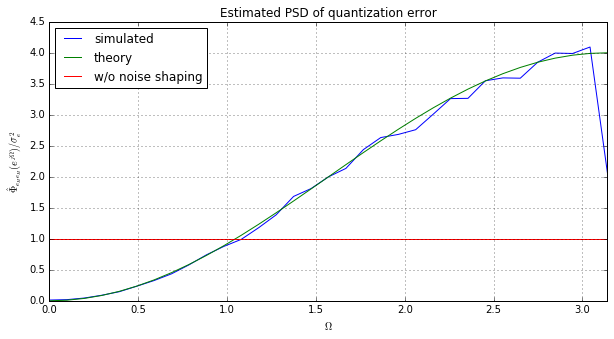

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

w = 8  # wordlength of the quantized signal
A = 1  # amplitude of input signal
N = 32768  # number of samples


def uniform_midtread_quantizer_w_ns(x, Q):
    # limiter
    x = np.copy(x)
    idx = np.where(x <= -1)
    x[idx] = -1
    idx = np.where(x > 1 - Q)
    x[idx] = 1 - Q
    # linear uniform quantization with noise shaping
    xQ = Q * np.floor(x/Q + 1/2)
    e = xQ - x
    xQ = xQ - np.concatenate(([0], e[0:-1]))
    
    return xQ[1:]


# quantization step
Q = 1/(2**(w-1))
# compute input signal
x = np.random.uniform(size=N, low=-A, high=(A-Q))
# quantize signal
xQ = uniform_midtread_quantizer_w_ns(x, Q)
e = xQ - x[1:]
# estimate PSD of error signal
nf, Pee = sig.welch(e, nperseg=64)
# estimate SNR
SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' %SNR)


plt.figure(figsize=(10,5))
Om = nf*2*np.pi
plt.plot(Om, Pee*6/Q**2, label='simulated')
plt.plot(Om, np.abs(1 - np.exp(-1j*Om))**2, label='theory')
plt.plot(Om, np.ones(Om.shape), label='w/o noise shaping')
plt.title('Estimated PSD of quantization error')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\hat{\Phi}_{e_H e_H}(e^{j \Omega}) / \sigma_e^2$')
plt.axis([0, np.pi, 0, 4.5]);
plt.legend(loc='upper left')
plt.grid()

**Exercise**

* The overall average SNR is lower than for the quantizer without noise shaping. Why?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>